In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Projet_Apprentissage_supervisé_M2_MLDS_21.zip

Archive:  /content/drive/MyDrive/Projet_Apprentissage_supervisé_M2_MLDS_21.zip
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Aide2-Imbalenced-learn.pdf  
   creating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Aide3-CodePython_classification_Sonar_data/
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Aide3-CodePython_classification_Sonar_data/project_classification_sonar.py  
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Aide3-CodePython_classification_Sonar_data/sonar.all-data.csv  
   creating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_Bancaires/
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_Bancaires/creditcard.csv  
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_Bancaires/VisaPremier.txt  
   creating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_relationnelles/
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_relationnelles/citeseer.mat  
  inflating: Projet_Apprentissage_supervisВ_M2_MLDS_21/Donn

In [ ]:
import pandas as pd
import numpy as np
import scipy.io as sio

**Matrice X**:

En prenant en considération que la matrice des *features*, on ignore les relations qui existe entre nos noeuds (les individus), vu que nos datasets sont des graphes, donc au lieu qu'un noeud dépendra que de son entourage (les noeuds avec lesquels il a des liens), il dépendra de toute la dataset.

**Matrice M**: 

Pour y remédier au problème de la matrice **X**, on la multiplie par la matrice d'adjacence **W**, ce qui revient a respecter la propagation de l'information dans le réseau (graphe) et apprendre les répresentations des noeuds en se basant sur leurs connéctivitées.

Cependant, la matrice **W** n'est généralement pas normalisé et donc la multiplication avec cette matrice changera complètement l'échelle des vecteurs de **X**.

Normaliser **X$\cdot$W** revient à normaliser **W** en multipliant par l'inverse de la matrice **D** (la matrice des degrées de chaque noeud). 

**Matrice W + I**: 

La matrice **M** représente la moyenne des features de l'entourage d'un noeud, et elle ignore les features du noeud lui même car: $w_{ii}=0 $.

Pour résoudre ce problème là, on ajoute une matrice identité **I** à la matrice d'adjacence **W** c.à.d ajouter des *self loops*, et puis on normalise avec **D$^{-1}$** (ie **D$^{-1}\cdot$(W + I)** *texte en italique*).

  **Symetric Normalization**: 
  
La normalisation avec **D$^{-1}$** normalise les lignes de la matrice **W**.
  
  Or si on multiplie **W** avec **D$^{-1/2}$** des deux cotés, on normalise les lignes et les colonnes de **W** (ie **D$^{-1/2}\cdot$(W + I)$\cdot$D$^{-1/2}$**).

# Cora

## Matrice X

In [ ]:
cora = sio.loadmat('/content/Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_relationnelles/cora.mat')

In [ ]:
X = cora['fea']
y = cora['gnd']

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.42066420664206644
Area Under the Curve achieved by Nearest Neighbors 0.31049979432332375
Average precision score, micro-averaged over all classes: 0.10



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7244772447724477
Area Under the Curve achieved by Linear SVM 0.27347799259563965
Average precision score, micro-averaged over all classes: 0.47



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.34317343173431736
Area Under the Curve achieved by RBF SVM 0.5
Average precision score, micro-averaged over all classes: 0.06



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.4071340713407134
Area Under the Curve achieved by Gaussian Process 0.40845331139448793
Average precision score, micro-averaged over all classes: 0.06



<--                   Decision Tre

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

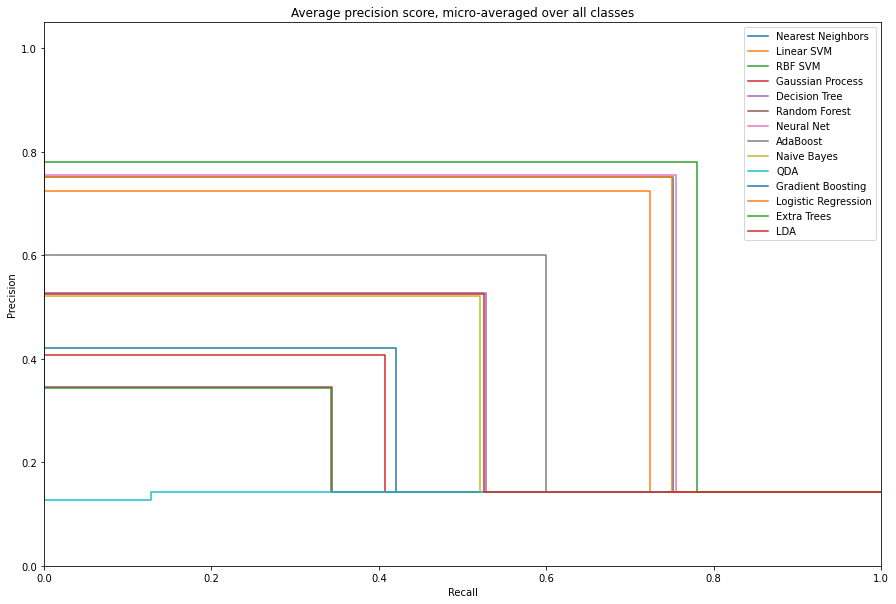

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

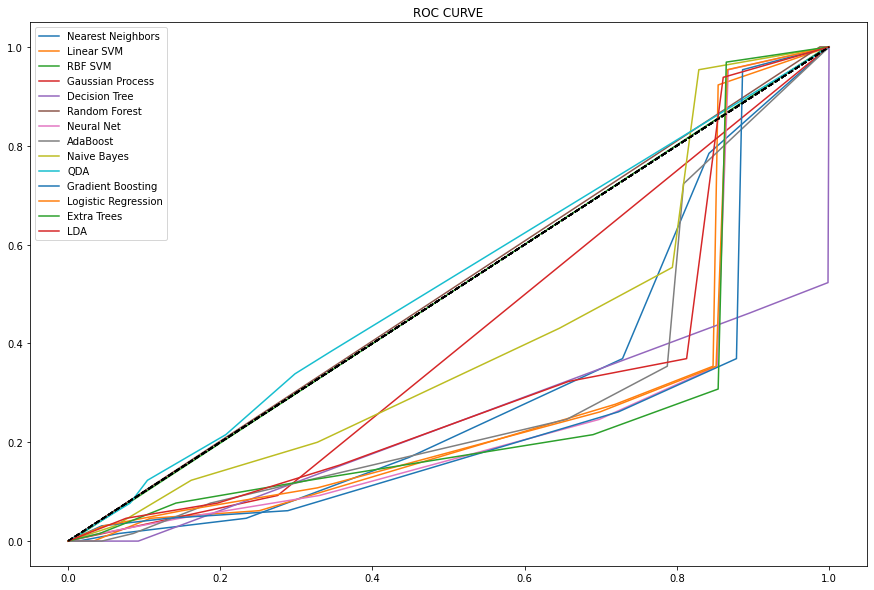

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Matrice M

In [ ]:
degrees = cora['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(cora['W'], X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.8154981549815498
Area Under the Curve achieved by Nearest Neighbors 0.23803990127519536
Average precision score, micro-averaged over all classes: 0.54



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.8314883148831488
Area Under the Curve achieved by Linear SVM 0.2272110242698478
Average precision score, micro-averaged over all classes: 0.57



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.3726937269372694
Area Under the Curve achieved by RBF SVM 0.4753496503496504
Average precision score, micro-averaged over all classes: 0.10



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.8364083640836408
Area Under the Curve achieved by Gaussian Process 0.2397264500205677
Average precision score, micro-averaged over all classes: 0.61



<--                   D

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

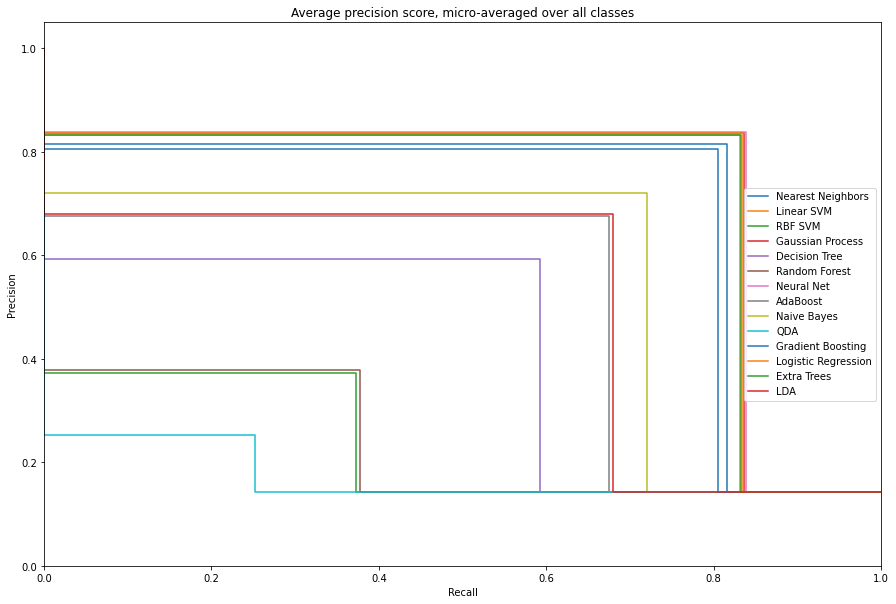

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

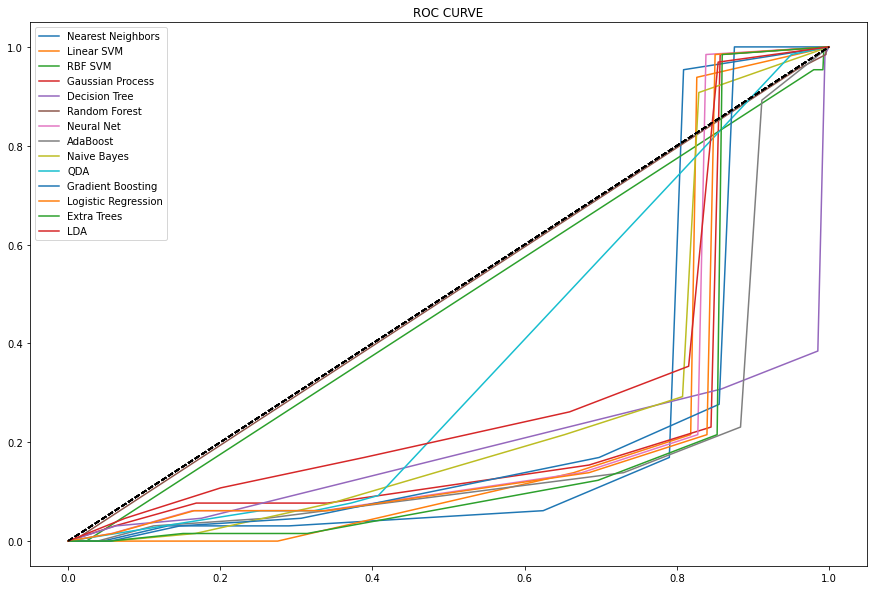

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')



```
# Ce texte est au format code
```

## Matrice W + I

In [ ]:
degrees = cora['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(cora['W']+np.diag(np.ones(len(degrees))), X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.8413284132841329
Area Under the Curve achieved by Nearest Neighbors 0.2203002879473468
Average precision score, micro-averaged over all classes: 0.65



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.8659286592865929
Area Under the Curve achieved by Linear SVM 0.20851501439736736
Average precision score, micro-averaged over all classes: 0.74



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.38253382533825336
Area Under the Curve achieved by RBF SVM 0.475627313862608
Average precision score, micro-averaged over all classes: 0.14



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.8757687576875769
Area Under the Curve achieved by Gaussian Process 0.20844302756067462
Average precision score, micro-averaged over all classes: 0.69



<--                   

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

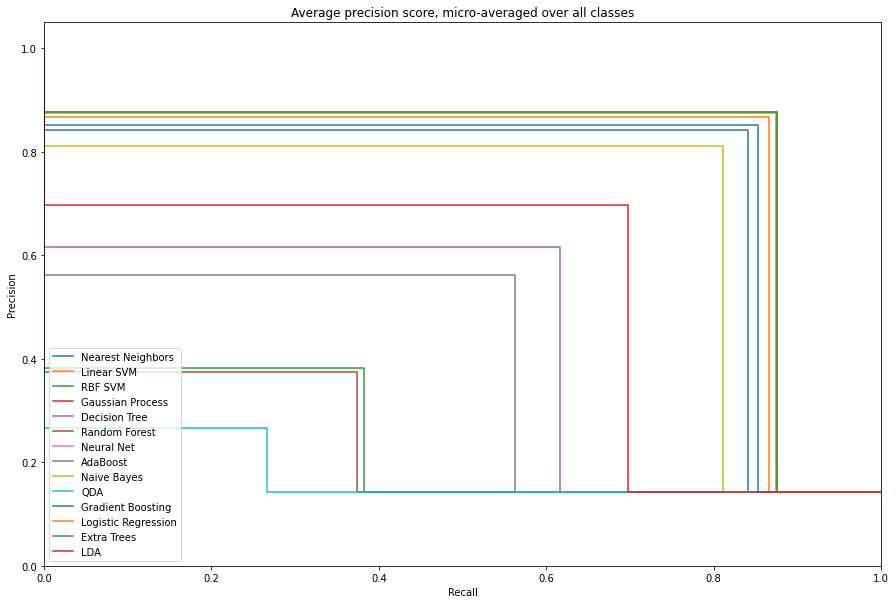

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

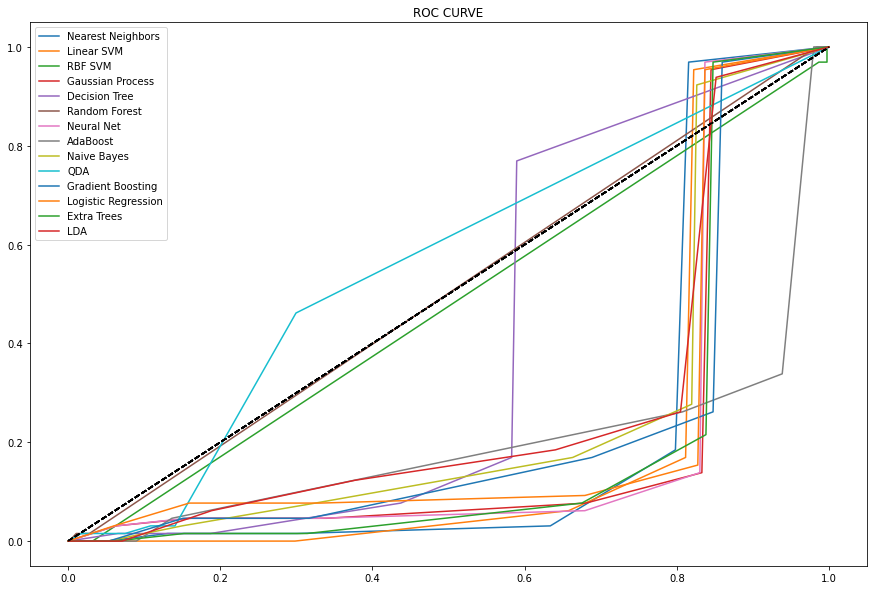

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Symetric Normalization

In [ ]:
degrees = cora['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = np.power(degrees[i], -0.5)

In [ ]:
M = D.dot(cora['W']+np.diag(np.ones(len(degrees)))).dot(D).dot(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.8019680196801968
Area Under the Curve achieved by Nearest Neighbors 0.21948786507610038
Average precision score, micro-averaged over all classes: 0.56



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.8696186961869619
Area Under the Curve achieved by Linear SVM 0.2302447552447553
Average precision score, micro-averaged over all classes: 0.71



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.38253382533825336
Area Under the Curve achieved by RBF SVM 0.47570958453311396
Average precision score, micro-averaged over all classes: 0.14



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.8646986469864698
Area Under the Curve achieved by Gaussian Process 0.23358700123406007
Average precision score, micro-averaged over all classes: 0.73



<--                 

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

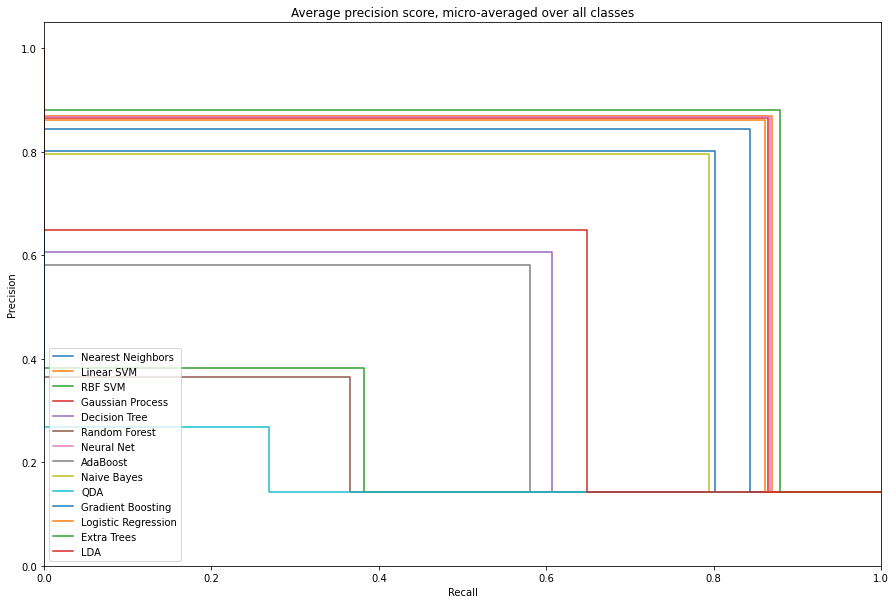

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

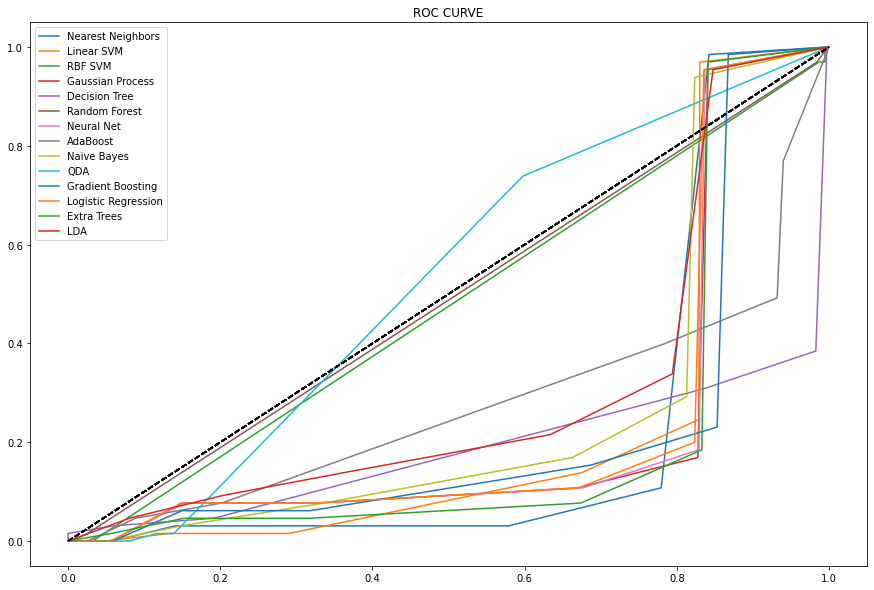

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

# Citeseer

##Matrice X


In [ ]:
citeseer = sio.loadmat('/content/Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_relationnelles/citeseer.mat')

In [ ]:
X = citeseer['fea']
y = citeseer['gnd']

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.1021021021021021
Area Under the Curve achieved by Nearest Neighbors 0.4939509517359378
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7327327327327328
Area Under the Curve achieved by Linear SVM 0.19068225564981817
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2182182182182182
Area Under the Curve achieved by RBF SVM 0.5030120481927711
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.5865865865865866
Area Under the Curve achieved by Gaussian Process 0.14962215726812575
Average precision score, micro-averaged over all classes: nan



<--                   Deci

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

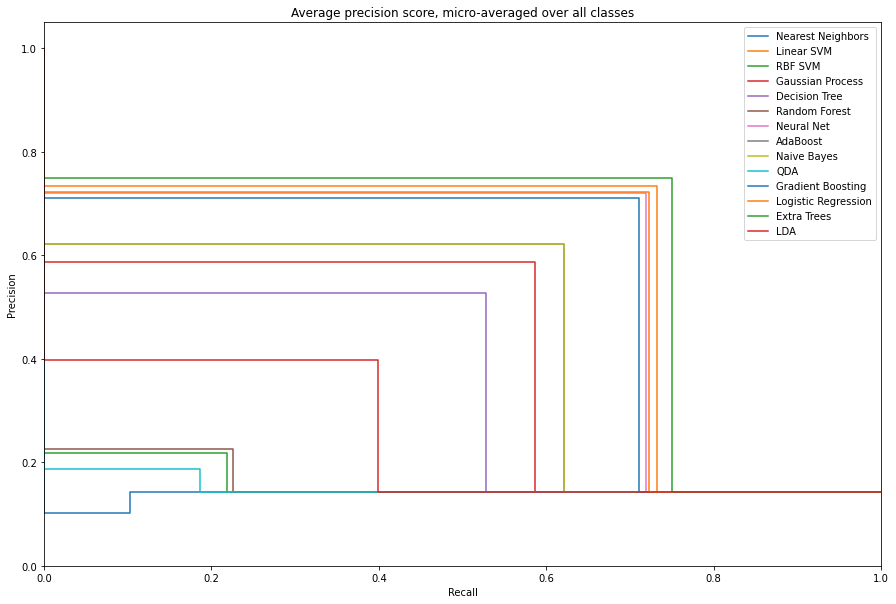

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

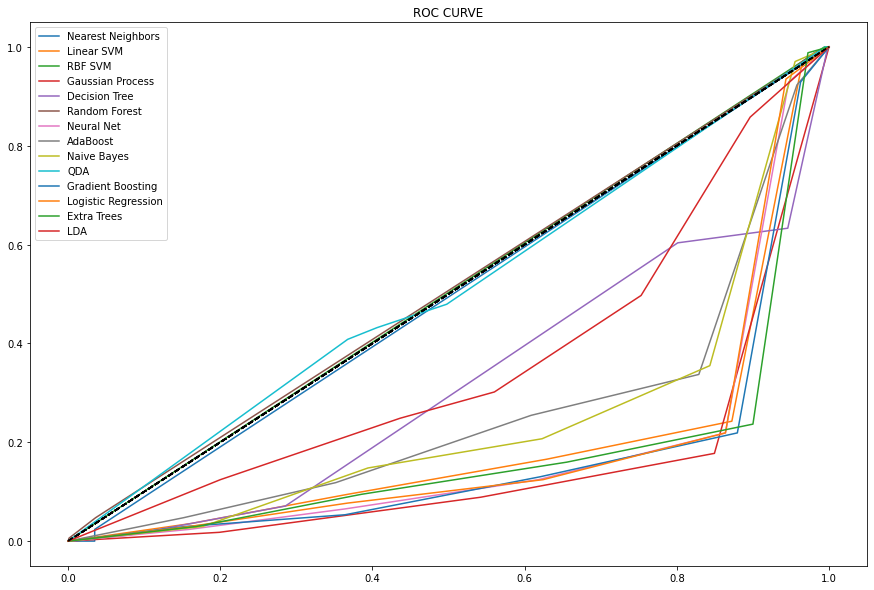

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

##Matrice M

In [ ]:
degrees = citeseer['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(citeseer['W'], X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.6576576576576577
Area Under the Curve achieved by Nearest Neighbors 0.2278070863334997
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7297297297297297
Area Under the Curve achieved by Linear SVM 0.15858344621087905
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2962962962962963
Area Under the Curve achieved by RBF SVM 0.4485314037213944
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.34134134134134136
Area Under the Curve achieved by Gaussian Process 0.4069366222285592
Average precision score, micro-averaged over all classes: nan



<--                   Deci

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

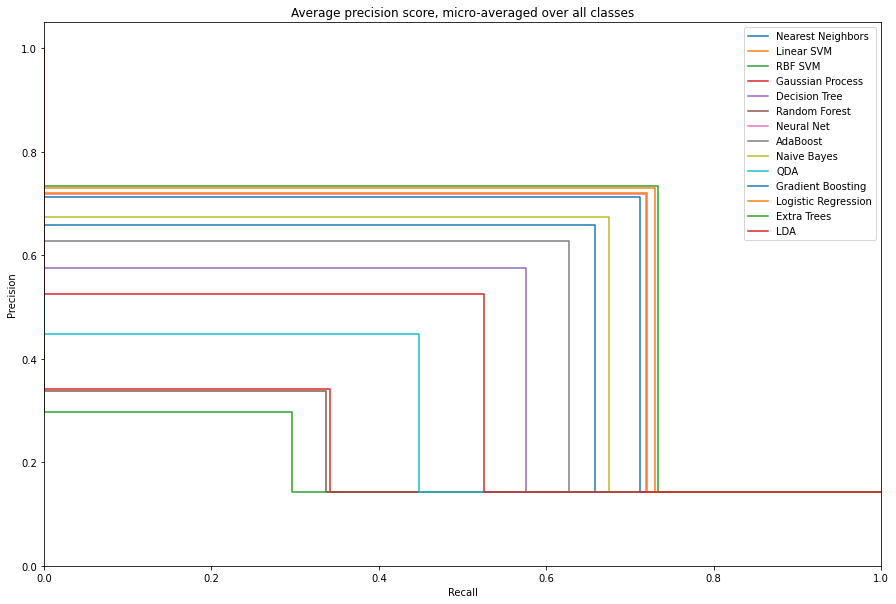

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])x
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

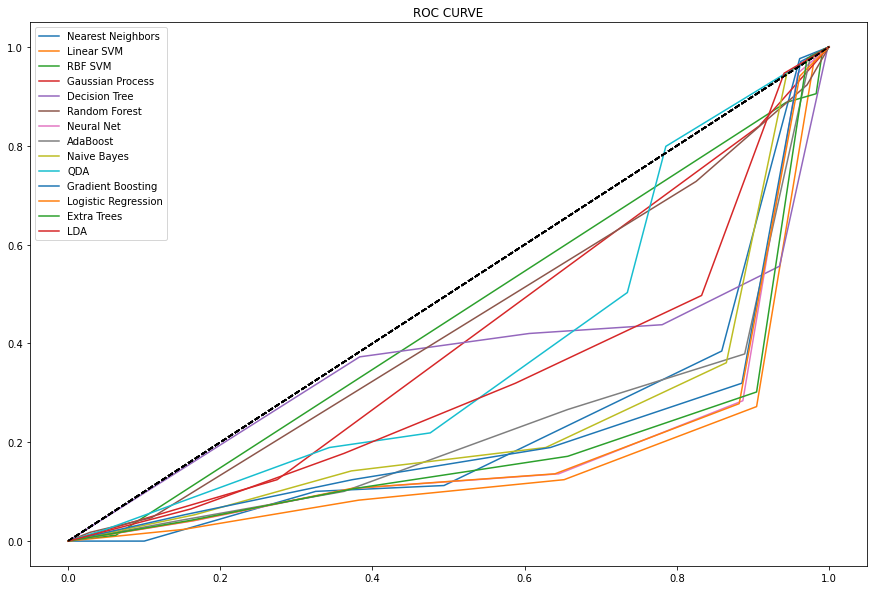

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Matrice W + I

In [ ]:
degrees = citeseer['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(citeseer['W']+np.diag(np.ones(len(degrees))), X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.7237237237237237
Area Under the Curve achieved by Nearest Neighbors 0.18420546089684184
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7827827827827828
Area Under the Curve achieved by Linear SVM 0.12602837385043134
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2962962962962963
Area Under the Curve achieved by RBF SVM 0.39689170884722325
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.21421421421421422
Area Under the Curve achieved by Gaussian Process 0.5
Average precision score, micro-averaged over all classes: nan



<--                   Decision Tree    

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

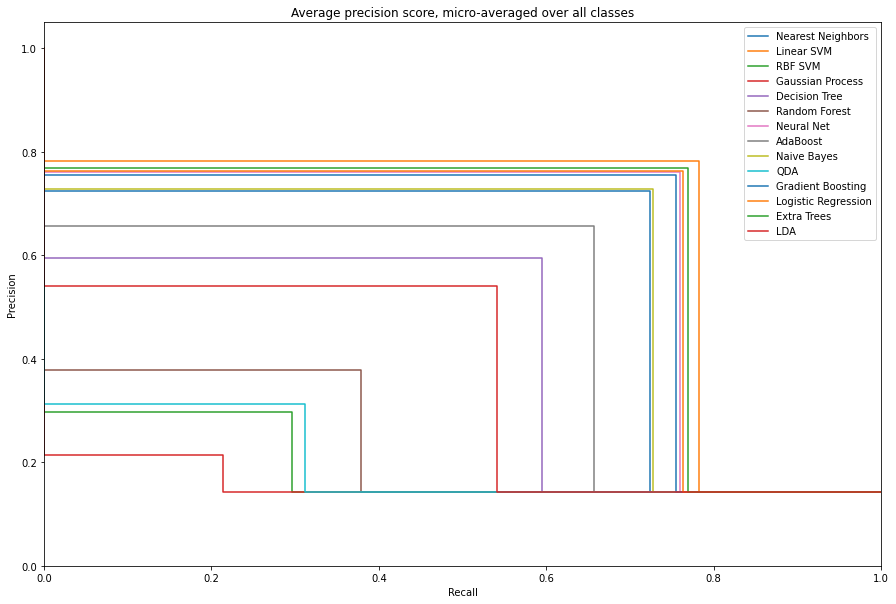

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

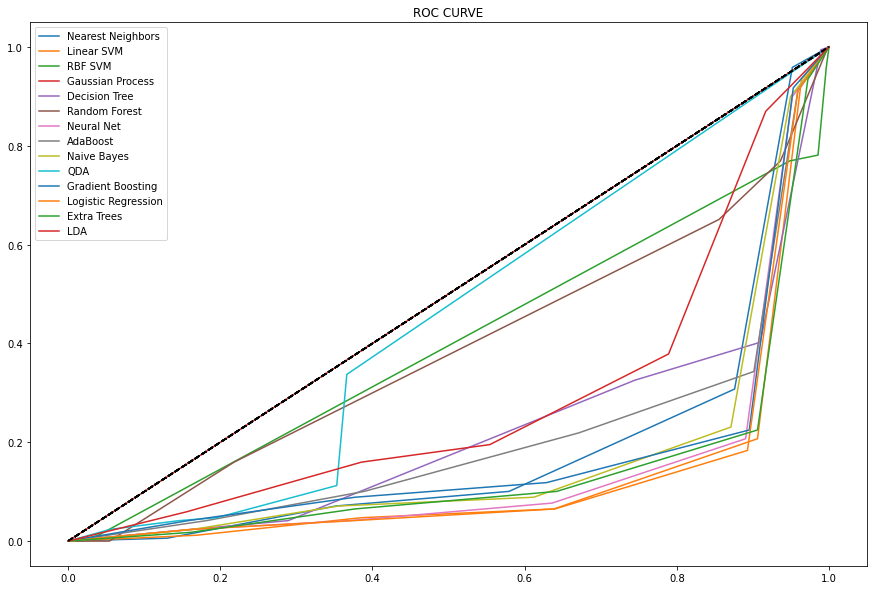

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Symetric Normalization

In [ ]:
degrees = citeseer['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = np.power(degrees[i], -0.5)

In [ ]:
M = D.dot(citeseer['W']+np.diag(np.ones(len(degrees)))).dot(D).dot(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.6556556556556556
Area Under the Curve achieved by Nearest Neighbors 0.1813288657588936
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7827827827827828
Area Under the Curve achieved by Linear SVM 0.12917943965209955
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2932932932932933
Area Under the Curve achieved by RBF SVM 0.3945818778070864
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.21421421421421422
Area Under the Curve achieved by Gaussian Process 0.5
Average precision score, micro-averaged over all classes: nan



<--                   Decision Tree      

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

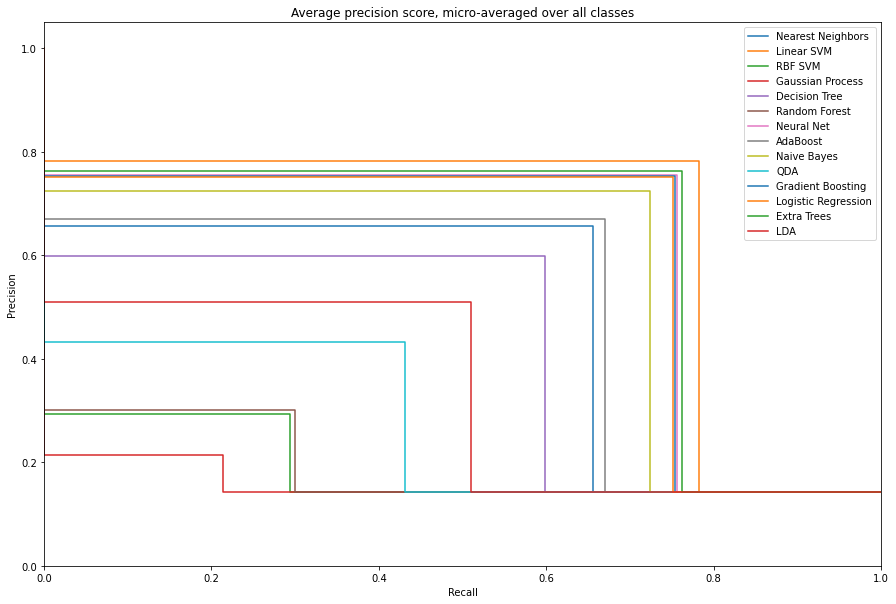

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

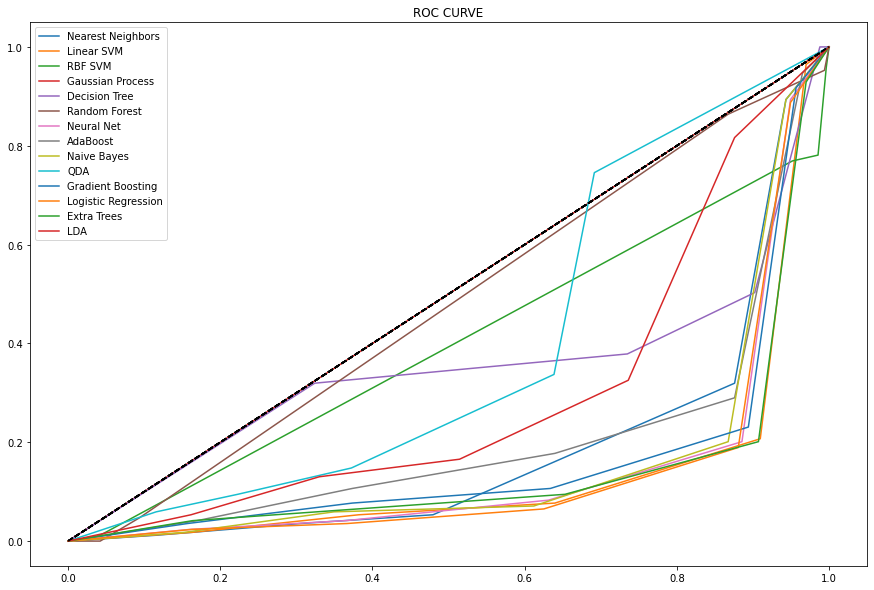

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

# Pubmed

## Matrice X

In [ ]:
pubmed = sio.loadmat('/content/Projet_Apprentissage_supervisВ_M2_MLDS_21/Donnees_relationnelles/pubmed.mat')

In [ ]:
X = pubmed['fea']
y = pubmed['gnd']

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.7630155510480054
Area Under the Curve achieved by Nearest Neighbors 0.41321178316360907
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.6078431372549019
Area Under the Curve achieved by Linear SVM 0.38908286330298186
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.8818458417849898
Area Under the Curve achieved by RBF SVM 0.3873628409725297
Average precision score, micro-averaged over all classes: nan



<--                   Decision Tree                    -->


In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

In [ ]:
 plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

##Matrice M

In [ ]:
degrees = pubmed['W'].sum(axis=0)
degrees = np.asarray(degrees)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[0][i]

In [ ]:
tmp = np.dot(pubmed['W'], X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.6576576576576577
Area Under the Curve achieved by Nearest Neighbors 0.2278070863334997
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7297297297297297
Area Under the Curve achieved by Linear SVM 0.15858344621087905
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2962962962962963
Area Under the Curve achieved by RBF SVM 0.4485314037213944
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.34134134134134136
Area Under the Curve achieved by Gaussian Process 0.4069366222285592
Average precision score, micro-averaged over all classes: nan



<--                   Deci

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

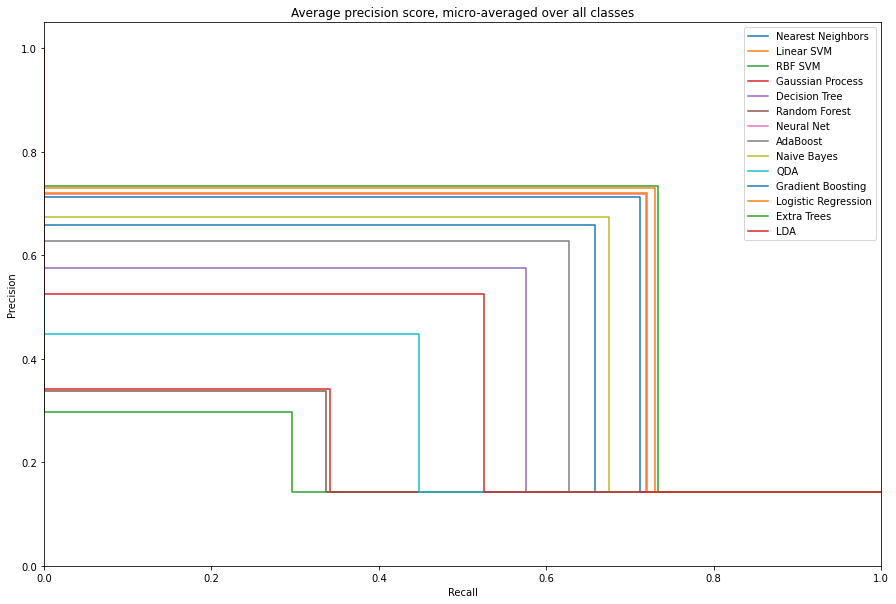

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])x
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

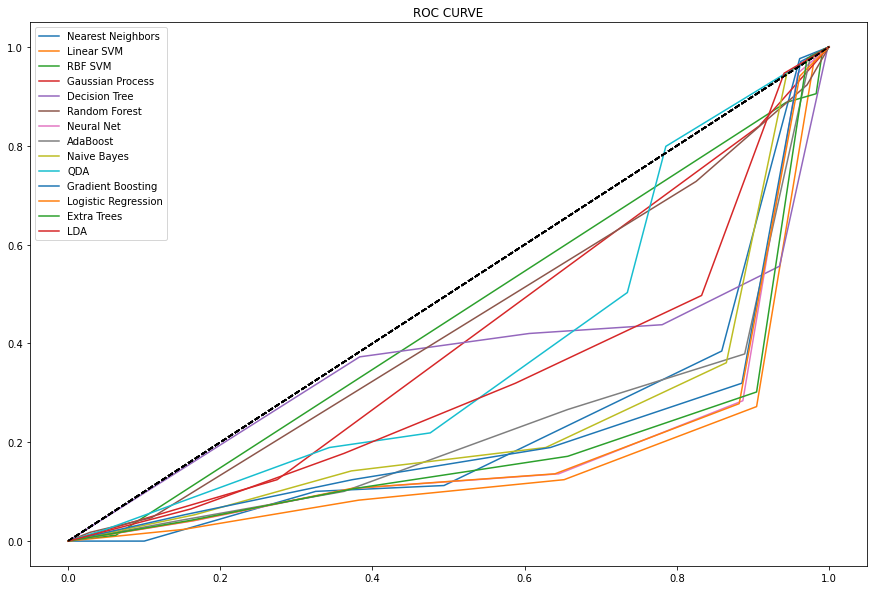

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Matrice W + I

In [ ]:
degrees = pubmed['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(pubmed['W']+np.diag(np.ones(len(degrees))), X)
M = np.dot(D, tmp)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.7237237237237237
Area Under the Curve achieved by Nearest Neighbors 0.18420546089684184
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7827827827827828
Area Under the Curve achieved by Linear SVM 0.12602837385043134
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2962962962962963
Area Under the Curve achieved by RBF SVM 0.39689170884722325
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.21421421421421422
Area Under the Curve achieved by Gaussian Process 0.5
Average precision score, micro-averaged over all classes: nan



<--                   Decision Tree    

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

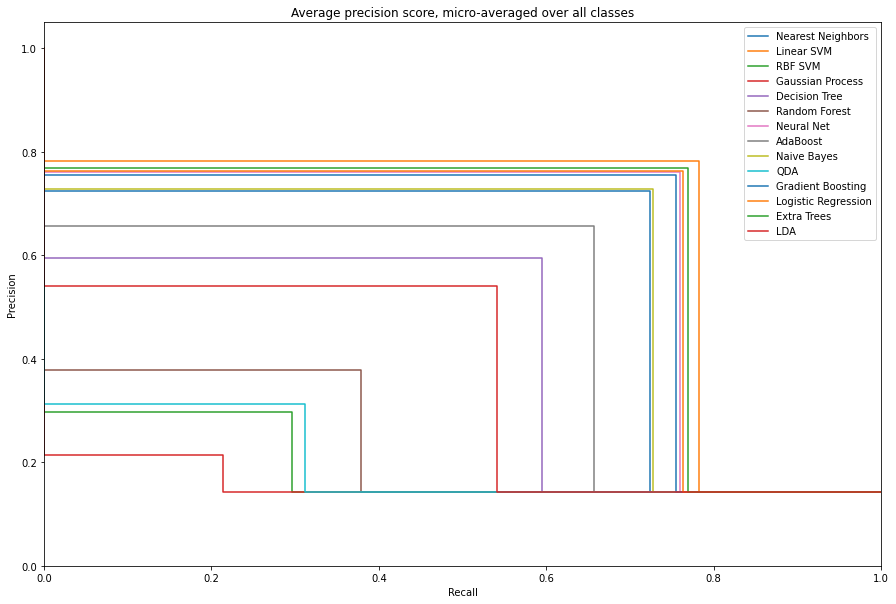

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

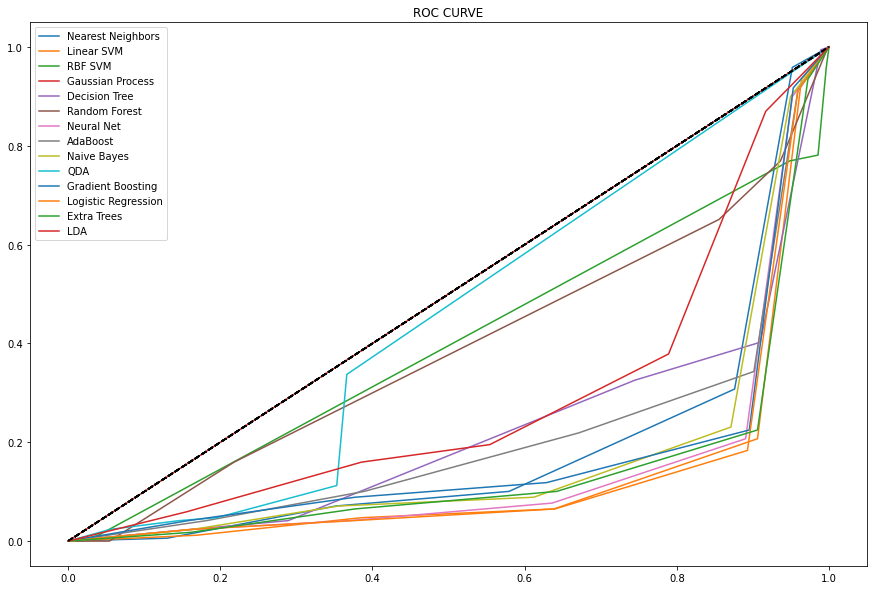

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

## Symetric Normalization

In [ ]:
degrees = pubmed['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = np.power(degrees[i], -0.5)

In [ ]:
M = D.dot(pubmed['W']+np.diag(np.ones(len(degrees)))).dot(D).dot(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis()]

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = \
    train_test_split(M, y, test_size=.3, random_state=42)

precision_clf = dict()
recall_clf = dict()
average_precision_clf = dict()
auc_clf = dict()
acc_clf = dict()

# iterate over classifiers
for name, clf in zip(names, classifiers):

    print('<-- {0:^50} -->'.format(name))

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Accuracy achieved by {} ".format(name, 'G') + str(score))
    acc_clf[name] = score

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
    print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
    auc_c = dict()
    auc_c['auc'] = auc(fpr, tpr)
    auc_c['fpr'] = fpr
    auc_c['tpr'] = tpr
    auc_clf[name] = auc_c
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(1, 8):
        precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])
        average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=8)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=8)[:,1:].ravel())
    average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=8)[:, i] , to_categorical(clf.predict(X_test), num_classes=8)[:, i],
                                                        average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    print("\n\n")

    precision_clf[name] = precision
    recall_clf[name] = recall
    average_precision_clf[name] = average_precision

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.6556556556556556
Area Under the Curve achieved by Nearest Neighbors 0.1813288657588936
Average precision score, micro-averaged over all classes: nan



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7827827827827828
Area Under the Curve achieved by Linear SVM 0.12917943965209955
Average precision score, micro-averaged over all classes: nan



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2932932932932933
Area Under the Curve achieved by RBF SVM 0.3945818778070864
Average precision score, micro-averaged over all classes: nan



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.21421421421421422
Area Under the Curve achieved by Gaussian Process 0.5
Average precision score, micro-averaged over all classes: nan



<--                   Decision Tree      

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

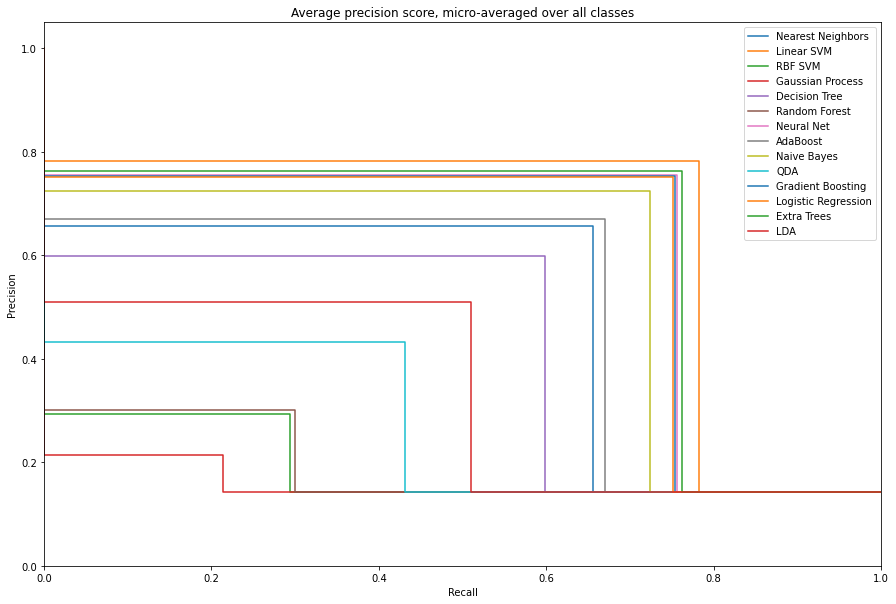

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

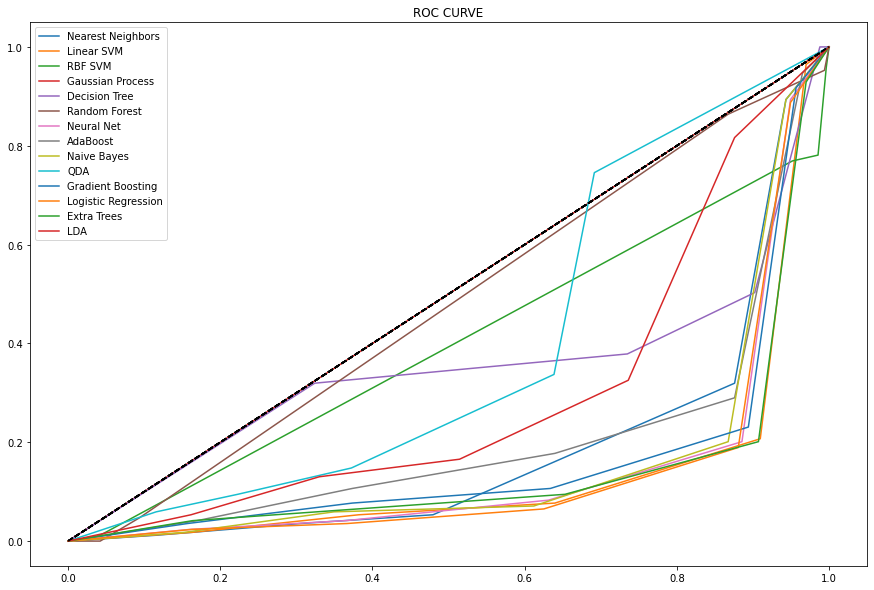

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')